# Final Project of Introduction to Bioinformatics

## Find The Imposter - Deciphering Mysterious Sequences

#### TA: Javad Razi (j.razi@outlook.com)

## Project Description: The Genomic Detective - Delving into Avian DNA with Galaxy

### Overview

Welcome to an exploratory journey into the world of bioinformatics, where we will delve into the DNA of flying species. This project presents a unique opportunity to unravel a genomic mystery using Galaxy, a sophisticated yet user-friendly bioinformatics platform. Your mission is to assemble a genome from short-read sequences, revealing insights into a specific DNA sequence found in various avian species. Along the way, you'll learn to navigate the complexities of genome assembly and conduct detailed BLAST searches, piecing together a puzzle millions of years in the making. 

### Objectives and Workflow

1. **Introduction and Setup with Galaxy:**
   - Start by exploring the Galaxy platform, designed for bioinformatics analysis. You can find a comprehensive introduction and a step-by-step guide on how to use Galaxy, including how to set up your work environment and get data into Galaxy, at the [Galaxy Project Training Network](https://training.galaxyproject.org/). This resource provides a hands-on introduction to Genomics and Galaxy, covering basic aspects like creating a new history and using the Get Data toolbox.

2. **Genome Assembly:**
   - For learning about genome assembly methods, the [Galaxy Project Training Network](https://training.galaxyproject.org/) offers a variety of resources and guides. This site provides access to a wide range of learning materials, helping users to understand the intricacies of genome assembly within the Galaxy platform.

3. **Performing BLAST Searches:**
   - To understand how to perform BLAST searches using Galaxy, the NCBI BLAST User Guide remains a crucial resource. You can access it at [NCBI's BLAST User Guide](https://www.ncbi.nlm.nih.gov/books/NBK279690/). This guide offers detailed instructions and insights into using BLAST for sequence comparison and analysis.

4. **Comparative Genomics and Analysis:**
   - Compare your findings against existing genomic data. This comparative analysis will help you shed light on the unique aspects of your assembled sequence and its significance in avian genetics.

### Specific Deliverables

- **Complete Code:** Submit all the code you used for assembling the genome, performing BLAST searches, and further analysis. Ensure your code is well-commented and organized for clarity.
- **Assembled Genome Fasta File:** Provide the fasta file of the assembled genome. This should be the direct output of your assembly process.
- **BLAST Results CSV File:** Include a CSV file with the results from your BLAST searches. This file should contain detailed information about any genomic matches found.
- **Detailed Interpretation:** At the end of your notebook, include a thorough interpretation of your findings. Discuss the significance of the sequence within the avian genome, any similarities or differences with sequences in other species, and the potential implications of these results. Your interpretation should be grounded in the data analysis conducted.

In [1]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'bioblend',
    'biopython',
    'pandas'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

bioblend (1.2.0) is installed
biopython (1.81) is installed
pandas (2.1.2) is installed


## Part 1: Assembling Using Galaxy

#### Option 1: Python Notebook

Finish this section of notebook to assemble a genome from a fasta file with short-read sequences.

#### Option 2: Galaxy Web Interface

Alternatively, you can use the Galaxy web interface at usegalaxy.org to complete the assembly. This approach allows you to experience the ease and efficiency of Galaxy's web-based tools.


In [2]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv(dotenv_path='../../.env')

# You can create your API key by registering at usegalaxy website, and from user settings section. 
# It is recommended that you store this key as an environment variable, and not expose it!
api_key = os.getenv('GALAXY_API_KEY')

In [50]:
import bioblend.galaxy

# Initialize Galaxy instance
gi = bioblend.galaxy.GalaxyInstance(url='https://usegalaxy.org', key=api_key)

In [51]:
# Upload the fasta file to Galaxy
fasta_path = './dataset/short_reads.fasta'
fasta_hist = gi.histories.create_history(name="FindTheImposterTask_Fasta")
fasta_dict = gi.tools.upload_file(fasta_path, fasta_hist['id'], type='fasta')

fasta_dict

{'outputs': [{'id': 'f9cad7b01a4721350e0bfd217803b9b1',
   'hda_ldda': 'hda',
   'uuid': '404cda10-b9e8-49a7-9639-581d30dd52e7',
   'hid': 1,
   'file_ext': 'auto',
   'peek': None,
   'model_class': 'HistoryDatasetAssociation',
   'name': 'short_reads.fasta',
   'deleted': False,
   'purged': False,
   'visible': True,
   'state': 'queued',
   'history_content_type': 'dataset',
   'file_size': 0,
   'create_time': '2024-02-03T10:41:41.243804',
   'update_time': '2024-02-03T10:41:41.287326',
   'data_type': 'galaxy.datatypes.data.Data',
   'genome_build': '?',
   'validated_state': 'unknown',
   'validated_state_message': None,
   'misc_info': None,
   'misc_blurb': None,
   'tags': [],
   'history_id': '29f5f1b44823c2b8',
   'metadata_dbkey': '?',
   'output_name': 'output0'}],
 'output_collections': [],
 'jobs': [{'model_class': 'Job',
   'id': 'bbd44e69cb8906b53dfa3cf21f92fa55',
   'state': 'new',
   'exit_code': None,
   'update_time': '2024-02-03T10:41:41.376834',
   'create_time'

In [52]:
# Identify and Prepare the Assembly Tool

# The only tool that we found suitable for this task is Trinity, which is a popular tool for de novo assembly of RNA-seq data.
# Other tools where either for pre and post processing of the data, or for other quality controls.
assembly_tool = gi.tools.get_tools(name='Trinity')[0]

assembly_params = {
    # Using the default mode to maintain a balance between different factors like speed, accuracy, etc.
    'mode_sel': 'default',
    
    # We only want to perform the assembly, and not other analysis.
    'operation_mode': 'assembly_only',
}

# Run the Assembly Tool
while True:
    try:
        assembly_dict = gi.tools.run_tool(fasta_hist['id'], assembly_tool['id'], assembly_params)
        print(f"Assembly job submitted")
        break
    except Exception as e:
        print(f"Failed to run the assembly tool: {e}")

# Wait for the assembly job to complete
assembly_dict = gi.jobs.wait_for_job(job_id=assembly_dict['jobs'][0]['id'], maxwait=120, interval=5, check=True)

Failed to run the assembly tool: Unexpected HTTP status code: 400: {"err_msg": "parameter 'input': specify a dataset of the required format / build for parameter", "err_code": 400008, "err_data": {"pool|inputs|input": "parameter 'input': specify a dataset of the required format / build for parameter"}, "param_errors": {"pool|inputs|input": {"message": "parameter 'input': specify a dataset of the required format / build for parameter", "message_suffix": "specify a dataset of the required format / build for parameter", "parameter_name": "input"}}}
Failed to run the assembly tool: Unexpected HTTP status code: 400: {"err_msg": "parameter 'input': specify a dataset of the required format / build for parameter", "err_code": 400008, "err_data": {"pool|inputs|input": "parameter 'input': specify a dataset of the required format / build for parameter"}, "param_errors": {"pool|inputs|input": {"message": "parameter 'input': specify a dataset of the required format / build for parameter", "message_

In [53]:
assembly_dict

{'model_class': 'Job',
 'id': 'bbd44e69cb8906b5261a009a270a6fea',
 'state': 'ok',
 'exit_code': 0,
 'update_time': '2024-02-03T10:42:29.555475',
 'create_time': '2024-02-03T10:41:54.919274',
 'galaxy_version': '23.2',
 'command_version': None,
 'copied_from_job_id': None,
 'tool_id': 'toolshed.g2.bx.psu.edu/repos/iuc/trinity/trinity/2.9.1+galaxy2',
 'history_id': '29f5f1b44823c2b8',
 'params': {'pool': '{"__current_case__": 0, "inputs": {"__current_case__": 0, "input": {"values": [{"id": 122369565, "src": "hda"}]}, "paired_or_single": "single", "strand": {"__current_case__": 0, "is_strand_specific": false}}, "pool_mode": "Yes"}',
  'norm': 'true',
  'additional_params': '{"guided": {"__current_case__": 0, "is_guided": "no"}, "long_reads": null, "min_contig_length": "200", "min_kmer_cov": "1"}',
  'chromInfo': '"/cvmfs/data.galaxyproject.org/managed/len/ucsc/?.len"',
  'dbkey': '"?"',
  '__input_ext': '"fasta"'},
 'inputs': {'pool|inputs|input': {'id': 'f9cad7b01a4721350e0bfd217803b9b1'

In [63]:
# Download the assembled genome from Galaxy. You can use the `download_dataset` method. A FASTA file, containing assembly
# of the whole sequence is what we expect here. 
assembled_genome_id = None

# Finding the assembled genome file id
# First get all the datasets from the working history
hist_id = fasta_hist['id']
hist_datasets = gi.histories.show_history(hist_id, contents=True)

# Then get the assembled genome file id (it's the file with "Assembled Transcripts in its name")
for dataset in hist_datasets:
    if "Assembled Transcripts" in dataset['name']:
        assembled_genome_id = dataset['id']
        break

# Now download the dataset via its APIs
try:
    gi.datasets.download_dataset(assembled_genome_id, file_path='./outputs/')
    print("The assembled genome was successfully downloaded and was saved in the outputs directory")
except Exception as e:
    print(f"Failed to download the assembled genome: {e}")

The assembled genome was successfully downloaded and was saved in the outputs directory


### Part 2: Using BLAST to Query The Assembled Sequence

In this part of the notebook, you will utilize the NCBI BLAST API to analyze the genome sequence you've assembled. This involves integrating the API into your notebook, submitting your sequence for BLAST querying, and then meticulously examining the results. Your focus will be on identifying similarities or unique traits in the sequence compared to others in the NCBI database, particularly exploring its relationship with known sequences in various species. This step is crucial for understanding the evolutionary and biological significance of your assembled genome.

**Note**: Unlike the previous section, for this one, you must deliver the full code in the notebook. Doing this part using website will not be graded. 

In [65]:
# Import necessary libraries
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from collections import defaultdict

In [66]:
# Load the assembled genome
with open('./outputs/Galaxy2-[Trinity_on_data_1__Assembled_Transcripts].fasta', 'r') as file:
    assembled_genome = file.read()

assembled_genome

'>TRINITY_DN0_c0_g1_i2 len=3001 path=[0:0-1724 2:1725-3000]\nTGCTCATTTGAAAGCTTATGCAAAAATTAACGAGGAATCACTGGATAGGGCTAGGAGATTGCTTTGGTGGCATTACAACTGTTTACTGTGGGGAGAAGCTCAAGTTACTAACTATATTTCTCGTTTGCGTACTTGGTTGTCAACTCCTGAGAAATATAGAGGTAGAGATGCCCCGACCATTGAAGCAATCACTAGACCAATCCAGGTGGCTCAGGGAGGCAGAAAAACAACTACGGGTACTAGAAAACCTCGTGGACTCGAACCTAGAAGAAGAAAAGTTAAAACCACAGTTGTCTATGGGAGAAGACGTTCAAAGTCCCGGGAAAGGAGAGCCCCTACACCCCAACGTGCGGGCTCCCCTCTCCCACGTAGTTCGAGCAGCCACCATAGATCTCCCTCGCCTAGGAAATAAATTACCTGCTAGGCATCACTTAGGTAAATTGTCAGGACTATATCAAATGAAGGGCTGTACTTTTAACCCAGAATGGAAAGTACCAGATATTTCGGATACTCATTTTAATTTAGATGTAGTTAATGAGTGCCCTTCCCGAAATTGGAAATATTTGACTCCAGCCAAATTCTGGCCCAAGAGCATTTCCTACTTTCCTGTCCAGGTAGGGGTTAAACCAAAGTATCCTGACAATGTGATGCAACATGAATCAATAGTAGGTAAATATTTAACCAGGCTCTATGAAGCAGGAATCCTTTATAAGCGGATATCTAAACATTTGGTCACATTTAAAGGTCAGCCTTATAATTGGGAACAGCAACACCTTGTCAATCAACATCACATTTATGATGGGGCAACATCCAGCAAAATCAATGGACGTCAGACGGATAGAAGGAGGAGAAATACTGTTAAACCAACTTGCCGGAAGGATGATCCCAAAAGGGACTTTGACATGGTCAGGCAAGTTTCCAACACTAGATCACGTGTTA

In [67]:
from Bio.Blast import NCBIWWW

# Perform the BLAST query, filtering for eukaryotes

result_handle = NCBIWWW.qblast(program="blastn", # Using blastn for a nucleotide BLAST 
                               database="nr", # Using the nucleotide database
                               sequence=assembled_genome, 
                               entrez_query="txid2759[ORGN]", # Got the tax id for eukaryotes from the NCBI website (from taxonomies section)
                               hitlist_size=100, 
                               word_size=16)

In [57]:
from Bio.Blast import NCBIXML

blast_records = NCBIXML.parse(result_handle)

blast_records

<generator object parse at 0x1474b3370>

In [6]:
import pandas as pd
from Bio import Entrez

# Set your email here for Entrez
Entrez.email = os.getenv('ENTREZ_EMAIL')

def fetch_taxonomy_info(accession):
    """
    Fetch taxonomy information using Entrez for a given accession number.
    """
    handle = Entrez.efetch(db="nucleotide", id=accession, retmode="xml")
    records = Entrez.read(handle)
    handle.close() # Close the handle to avoid memory leaks
    
    taxonomy = records[0]["GBSeq_taxonomy"]    
    species = records[0]["GBSeq_organism"]
    
    return taxonomy, species


def parse_blast_results():
    """
    Parse BLAST results and extract relevant information including taxonomy.
    """
    blast_results = []

    for record in blast_records:
        for alignment in record.alignments:
            accession = alignment.accession
            taxonomy, species = fetch_taxonomy_info(accession)
            for hsp in alignment.hsps:
                # These fields are required in your submission
                blast_results.append({
                    'query_id': record.query_id,
                    'alignment_title': alignment.title,
                    'e_value': hsp.expect,
                    'identity': hsp.identities,
                    'accession': accession,
                    'taxonomy': taxonomy,
                    'species': species
                })
    return blast_results


blast_results = parse_blast_results()
df = pd.DataFrame(blast_results)
df.to_csv('./outputs/blast_results_with_taxonomy.csv', index=False)

df.head()

,query_id,alignment_title,e_value,identity,accession,taxonomy,species
0,Query_1685582,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,0.000000e+00,1167,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
1,Query_1685582,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,4.357290e-61,532,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
2,Query_1685582,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,0.000000e+00,1167,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
3,Query_1685582,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,1.852770e-59,531,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
4,Query_1685582,gi|389587607|gb|JQ978781.1| Melopsittacus undu...,0.000000e+00,1167,JQ978781,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus


## Analysis of The Results

### Drawing Your Own Conclusions

Now that you have completed the BLAST search, a fascinating part of your journey begins – interpreting the data. This stage is where your critical thinking and creativity come into play. From now on, the rest of the notebook will be about whatever you want it to be. Any path that leads to meaningful insights about the data and provides a solid conclusion for the task is acceptable. Let's explore some possible directions:

1. **Species-Specific Patterns:** Examine if the sequence is found exclusively or predominantly in certain species. What could this suggest about its evolution and adaptation? While the focus is not on finding a 'correct' answer, pondering this aspect can lead to interesting hypotheses about species-specific interactions.

2. **Functional Insights:** Reflect on the potential roles this sequence might play within the genomes where it's found. Could it be integral to certain biological functions, or a legacy of ancient genomic events?

3. **Comparative Genomics:** Compare your findings with sequences in other species. Notice any striking similarities or differences? These comparisons could shed light on the sequence's evolutionary journey.

4. **Ecological and Environmental Context:** Consider the ecological and environmental factors that might influence the distribution and evolution of this sequence. How might habitat or lifestyle of the species play a role in its presence or absence?

### Additional Tips and Encouragement

This project is more about the learning journey and less about achieving perfect results. Here are some additional pointers:

1. **Deep Dives:** Encourage yourself to explore the data thoroughly. Use various bioinformatics tools to gain a holistic understanding.

2. **Creative Visualization:** Craft visual representations of your analysis. Effective use of charts or infographics can provide insightful perspectives.

3. **Open-Ended Exploration:** Feel free to extend your analysis in directions you find intriguing. This could include phylogenetic studies or exploring the ecological aspects of the sequence.

Remember, this project is designed to be a learning experience. We don't expect you to uncover all the answers but rather to engage thoughtfully with the data and enjoy the process of discovery.

<blockquote style="font-family:Arial; color:green; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>Species-Specific Patterns</strong>
    </br>
    We will be examining sequences, patterns and their evolutions in the upcoming cells.
</blockquote>

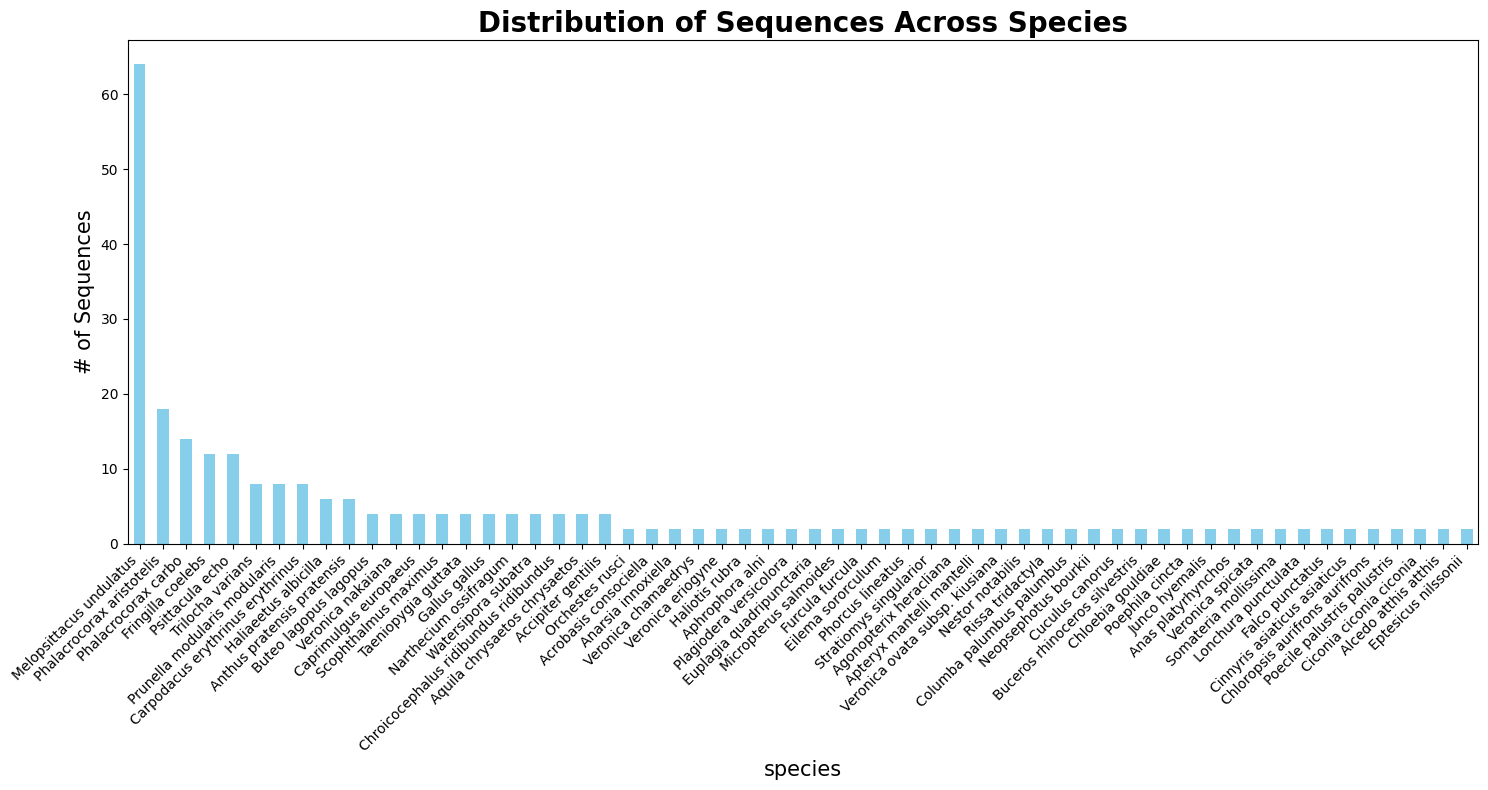

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# For the first step, it's good to analyze the distribution of different sequences in the results that we got from the BLAST

df = pd.read_csv("./outputs/blast_results_with_taxonomy.csv")

# Plotting the distribution of sequences across different species

# First configure the plot to make it readable
plt.figure(figsize=(15, 8))
plt.title("Distribution of Sequences Across Species", fontdict={'weight': 'bold', 'size': 20})
plt.xlabel("Species", fontdict={'size': 15})
plt.ylabel("# of Sequences", fontdict={'size': 15})

# And then get all the species and their counts and plot them
species_counts = df['species'].value_counts()
species_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot above provides us with different conclusions:
- The diversity of included species (about 60 unique species)
- The abundance and diversity of species like "Melopsittacus undulatus" compared to species like "Eptesicus nilssonii"
- Importance of different species and the impact that they have on our research, e.g. "Melopsittacus undulatus" is much more important than "Eptesicus nilssonii" and thus we may need further analysis and investigations to learn about "Eptesicus nilssonii"

Overall we can see the main differences between each species.

In [48]:
import pandas as pd

# For the second step we want to analyse the difference between the species further more
# We can do that by performing a simple calculation similar to the p-test, to find out the species with predominant sequences

df = pd.read_csv("./outputs/blast_results_with_taxonomy.csv")

# Get all species and their counts, the same way as before
species_counts = df['species'].value_counts()

# Get the proportion of sequences in each species by dividing its count by the total number of sequences
proportion_sequences = species_counts / len(df)
print("\033[35m" + "Proportion of Sequences in All Species:" + "\033[0m")
for species, proportion in proportion_sequences.items():
    print("\033[36m" + species + "\033[0m" + f": {proportion * 100:.3f}%")

# Now we only get the species with predominant sequences (similar to that of p-test, e.g. species > 5%)
threshold = 0.05
predominant_species = proportion_sequences[proportion_sequences > threshold]

print("\033[35m" + "Species with Predominant Sequences, (Threshold > 5%):" + "\033[0m")
for species, proportion in predominant_species.items():
    print("\033[36m" + species + "\033[0m" + f": {proportion * 100:.3f}%")

Proportion of Sequences in All Species:
Melopsittacus undulatus: 23.358%
Phalacrocorax aristotelis: 6.569%
Phalacrocorax carbo: 5.109%
Fringilla coelebs: 4.380%
Psittacula echo: 4.380%
Trilocha varians: 2.920%
Prunella modularis modularis: 2.920%
Carpodacus erythrinus erythrinus: 2.920%
Haliaeetus albicilla: 2.190%
Anthus pratensis pratensis: 2.190%
Buteo lagopus lagopus: 1.460%
Veronica nakaiana: 1.460%
Caprimulgus europaeus: 1.460%
Scophthalmus maximus: 1.460%
Taeniopygia guttata: 1.460%
Gallus gallus: 1.460%
Narthecium ossifragum: 1.460%
Watersipora subatra: 1.460%
Chroicocephalus ridibundus ridibundus: 1.460%
Aquila chrysaetos chrysaetos: 1.460%
Accipiter gentilis: 1.460%
Orchestes rusci: 0.730%
Acrobasis consociella: 0.730%
Anarsia innoxiella: 0.730%
Veronica chamaedrys: 0.730%
Veronica eriogyne: 0.730%
Haliotis rubra: 0.730%
Aphrophora alni: 0.730%
Plagiodera versicolora: 0.730%
Euplagia quadripunctaria: 0.730%
Micropterus salmoides: 0.730%
Furcula furcula: 0.730%
Eilema sororcul

We can compare the species with a different view and even more precise now. We also can see the diversity of them and how different they are from each other.

We know that the predominant species like "Melopsittacus undulatus" or "Phalacrocorax aristotelis" may possess unique genomic features, evolutions, etc and it means that they worth doing further investigation. We can basically prioritize our investigations using those values.

This cell was nothing but a different view of the previous cell. Comparing with numbers is much more tangible than with the plots.